In [32]:
import pandas as pd
import numpy as np
df = pd.read_csv("./train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X = df.drop("label", axis=1)
y = df["label"]
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

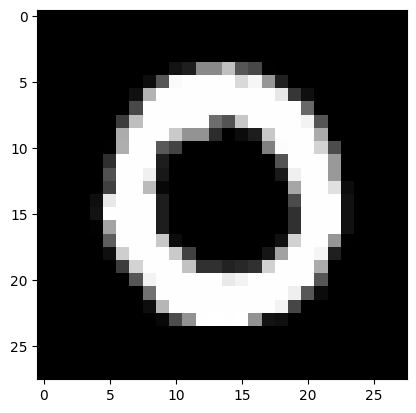

In [35]:
from matplotlib.pyplot import imshow
def display_image(X: pd.DataFrame, index: int):
    """Displays the image from the dataset X
    based on image <index> within the dataset
    
    Precondition:
        - <index> must be valid index in dataset X
        - The dataset X only has columns which holds pixelX
    """
    
    image_size = 28
    acc = []
    for i, pixel in enumerate(X.iloc[index]):
        if i % 28 == 0:
            acc.append([pixel])
            continue
        acc[-1].append(pixel)
    acc = np.array(acc)
    imshow(acc, cmap="gray")
display_image(X, 1)

In [36]:
from torch import IntTensor, LongTensor, nn, from_numpy, FloatTensor, argmax
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset

In [37]:
train_X_tensor = from_numpy((X_train  / 255).to_numpy().astype(float)).type(FloatTensor).view(-1, 1, 28, 28)
train_y_tensor = from_numpy((y_train).to_numpy().astype(int)).type(LongTensor)
train_dataset = TensorDataset(train_X_tensor, train_y_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [38]:
test_X_tensor = from_numpy((X_test / 255).to_numpy().astype(float)).type(FloatTensor).view(-1, 1, 28, 28)
test_y_tensor = from_numpy((y_test).to_numpy().astype(int)).type(LongTensor)
test_dataset = TensorDataset(test_X_tensor, test_y_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=32)

In [39]:
def train_loop(model, dataloader, loss_fn, optimizer):
    """
    Precondition:
        - loss_fn is a torch loss function
        - optimizer is a torch optimizer function 
        - dataloader is a torch Dataloader
    """
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        loss = loss_fn(model(X), y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            print(f"loss: {loss.item()} batch: {batch // 100}")

    print("loss: ", loss.item())

In [40]:
from torch import no_grad


def test_loop(model, dataloader, loss_fn):
  """
    Precondition:
      - loss_fn is a torch loss function
      - optimizer is a torch optimizer function 
      - dataloader is a torch Dataloader
  """
  model.eval()
  total = 0
  total_loss = 0
  correct = 0
  correct_total = 0
  with no_grad():
    for X, y in dataloader:
      pred = model(X)
      total_loss += loss_fn(pred, y).item()
      total += 1
      correct += (argmax(pred, dim=1) == y).sum().item()
      correct_total += len(y)
  print(total_loss, total, correct, correct_total)
  print("Test Total loss: ", total_loss / total, "Average Correct Predictions", correct / correct_total)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3), # -> (32, 26, 24)
            nn.MaxPool2d(kernel_size=2, stride=2), # -> (32, 13, 13)
            nn.Conv2d(32, 64, kernel_size=3), # -> (64, 11, 11)
            nn.MaxPool2d(kernel_size=2, stride=2), # -> (64, 5, 5)
            nn.Conv2d(64, 128, kernel_size=3), # -> (128, 3, 3)
            nn.Flatten(),
            nn.Linear(128 * 3 * 3, 10),
        )
    def forward(self, x):
        return self.model(x)

In [ ]:
model = CNN()
loss_fn = nn.CrossEntropyLoss()
optim = Adam(model.parameters())
for epoch in range(10):
    train_loop(model, train_dataloader, loss_fn, optim)
    test_loop(model, test_dataloader, loss_fn)

loss: 2.295849561691284 batch: 0
loss: 0.13862420618534088 batch: 1
loss: 0.09447984397411346 batch: 2
loss: 0.18501918017864227 batch: 3
loss: 0.25689443945884705 batch: 4
loss: 0.08347216993570328 batch: 5
loss: 0.25071612000465393 batch: 6
loss: 0.06504518538713455 batch: 7
loss: 0.06443998962640762 batch: 8
loss:  0.004682374186813831
41.12394866487011 434 13468 13860
Test Total loss:  0.09475564208495418 Average Correct Predictions 0.9717171717171718
loss: 0.16395294666290283 batch: 0
loss: 0.010026735253632069 batch: 1
loss: 0.044950634241104126 batch: 2
loss: 0.11130646616220474 batch: 3
loss: 0.21493296325206757 batch: 4
loss: 0.028295116499066353 batch: 5
loss: 0.03106708638370037 batch: 6
loss: 0.0633884072303772 batch: 7
loss: 0.011377301067113876 batch: 8
loss:  0.111074298620224
46.91241080057807 434 13407 13860
Test Total loss:  0.10809311244372828 Average Correct Predictions 0.9673160173160174
loss: 0.24754607677459717 batch: 0
loss: 0.2661139667034149 batch: 1
loss: 0.0

KeyboardInterrupt: 

In [43]:
X_new = pd.read_csv("./test.csv")
X_new

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
new_X_tensor = from_numpy((X_new / 255).to_numpy().astype(float)).type(FloatTensor).view(-1, 1, 28, 28)

In [50]:
with no_grad():
  pred = argmax(model(new_X_tensor), dim=1)

torch.Size([28000])


In [ ]:
ans = pd.DataFrame(pred.numpy(), columns=["Label"])
ans.index.names = ["ImageId"]
ans.index += 1
ans.to_csv("example.csv")
# Score: 97.585%